In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "omicron-variant-of-covid19"

In [2]:
#Loading other libraries
library(ggthemes) # themes
library(repr) #Resizing plots

**About the dataset**

**Omicron variant details till Jan 5th 2022**

**Context**

The Omicron variant, variant B.1.1.529, was first reported to WHO on 24 November 2021 and was classified as a variant of concern by WHO on 26 November 2021. The classification was made on the advice of the Technical Advisory Group on Virus Evolution, based primarily on information from South Africa that the variant has a large number of mutations and has caused a detrimental change in COVID-19 epidemiology.

The data set is downloaded from https://ourworldindata.org/

**Content**

The dataset contains:
Entity: Country Details
Code : Country: Country Code
Day: Day of Report
Omicron_Percentage: Percentage of Omnicron Impact on the day mentioned in Day column


**THE PLAN**

1. Visualize the Omicron variant, variant B.1.1.529 spread.

**Omicron variant details till Jan 5th 2022**

# Glimpse of what we are working with 

In [3]:
#Loading in the dataset
omicron <- read_csv("../input/omicron-variant-of-covid19/covid-cases-omicron.csv", show_col_types = FALSE)

# Viewing the first  6 rows
head(omicron, n = 6)

# Glimpse of the dataset
glimpse(omicron)

# Summary of the dataset
summary(omicron)





Entity,Code,Day,Omicron_percentage
<chr>,<chr>,<date>,<dbl>
Angola,AGO,2021-09-20,0
Angola,AGO,2021-10-04,0
Argentina,ARG,2021-09-20,0
Argentina,ARG,2021-10-04,0
Argentina,ARG,2021-10-18,0
Argentina,ARG,2021-11-01,0


Rows: 552
Columns: 4
$ Entity             <chr> "Angola", "Angola", "Argentina", "Argentina", "Arge…
$ Code               <chr> "AGO", "AGO", "ARG", "ARG", "ARG", "ARG", "ARG", "A…
$ Day                <date> 2021-09-20, 2021-10-04, 2021-09-20, 2021-10-04, 20…
$ Omicron_percentage <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 14.…


    Entity              Code                Day             Omicron_percentage
 Length:552         Length:552         Min.   :2021-09-20   Min.   :  0.0000  
 Class :character   Class :character   1st Qu.:2021-10-04   1st Qu.:  0.0000  
 Mode  :character   Mode  :character   Median :2021-11-01   Median :  0.0000  
                                       Mean   :2021-11-05   Mean   :  5.9250  
                                       3rd Qu.:2021-11-29   3rd Qu.:  0.1525  
                                       Max.   :2022-01-05   Max.   :100.0000  

# Let's start exploring and Visualizing.

**Making some adjustments**

In [4]:
#Lets start by renaming the variable
omicron <- omicron %>% rename(country = Entity, percentage = Omicron_percentage)

#checking
colnames(omicron)


[1] "country"    "Code"       "Day"        "percentage"

**How many country reported the Omicron Variant?**

In [5]:

x <- length(table(omicron$country))
paste("There are", x, "countries involved")

[1] "There are 89 countries involved"

**Top 10 countries with the highest percentage of Omicron impact in a day**

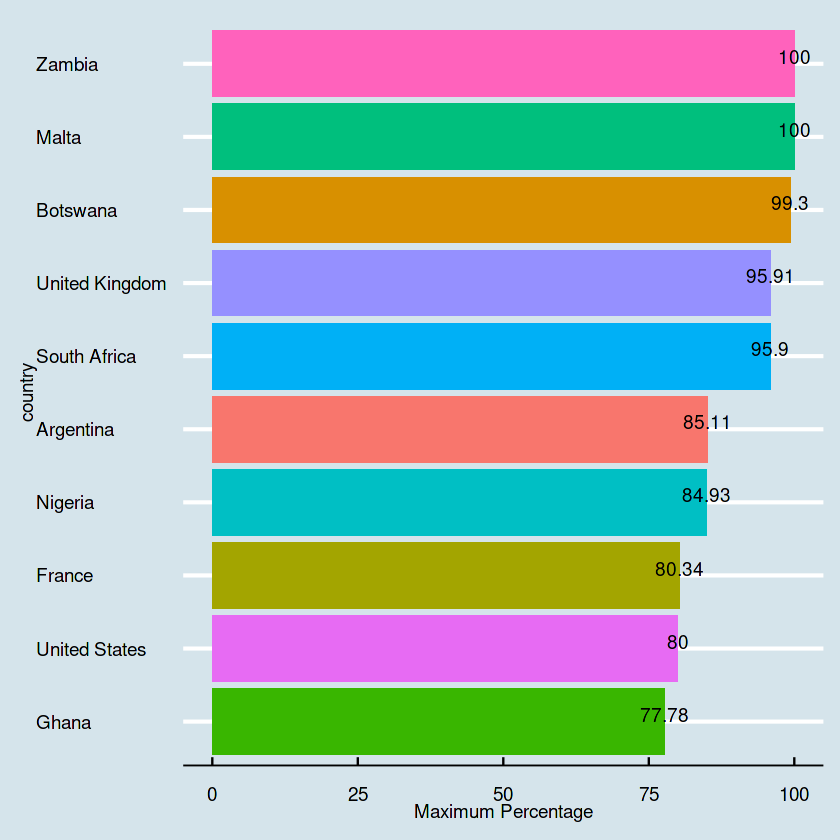

In [6]:


omicron %>% group_by(country) %>% summarise(max_pct = max(percentage)) %>% top_n(10, max_pct) %>% ggplot(aes(x = reorder(country, max_pct), y = max_pct, fill = country)) + geom_col(show.legend = FALSE) + coord_flip() + geom_text(aes(label = max_pct), vjust = 0.01) + theme_economist() + ylab("Maximum Percentage") + xlab("country")

**Looking at the trend of the Percentage of Omnicron impact on the day**

`summarise()` has grouped output by 'country'. You can override using the `.groups` argument.



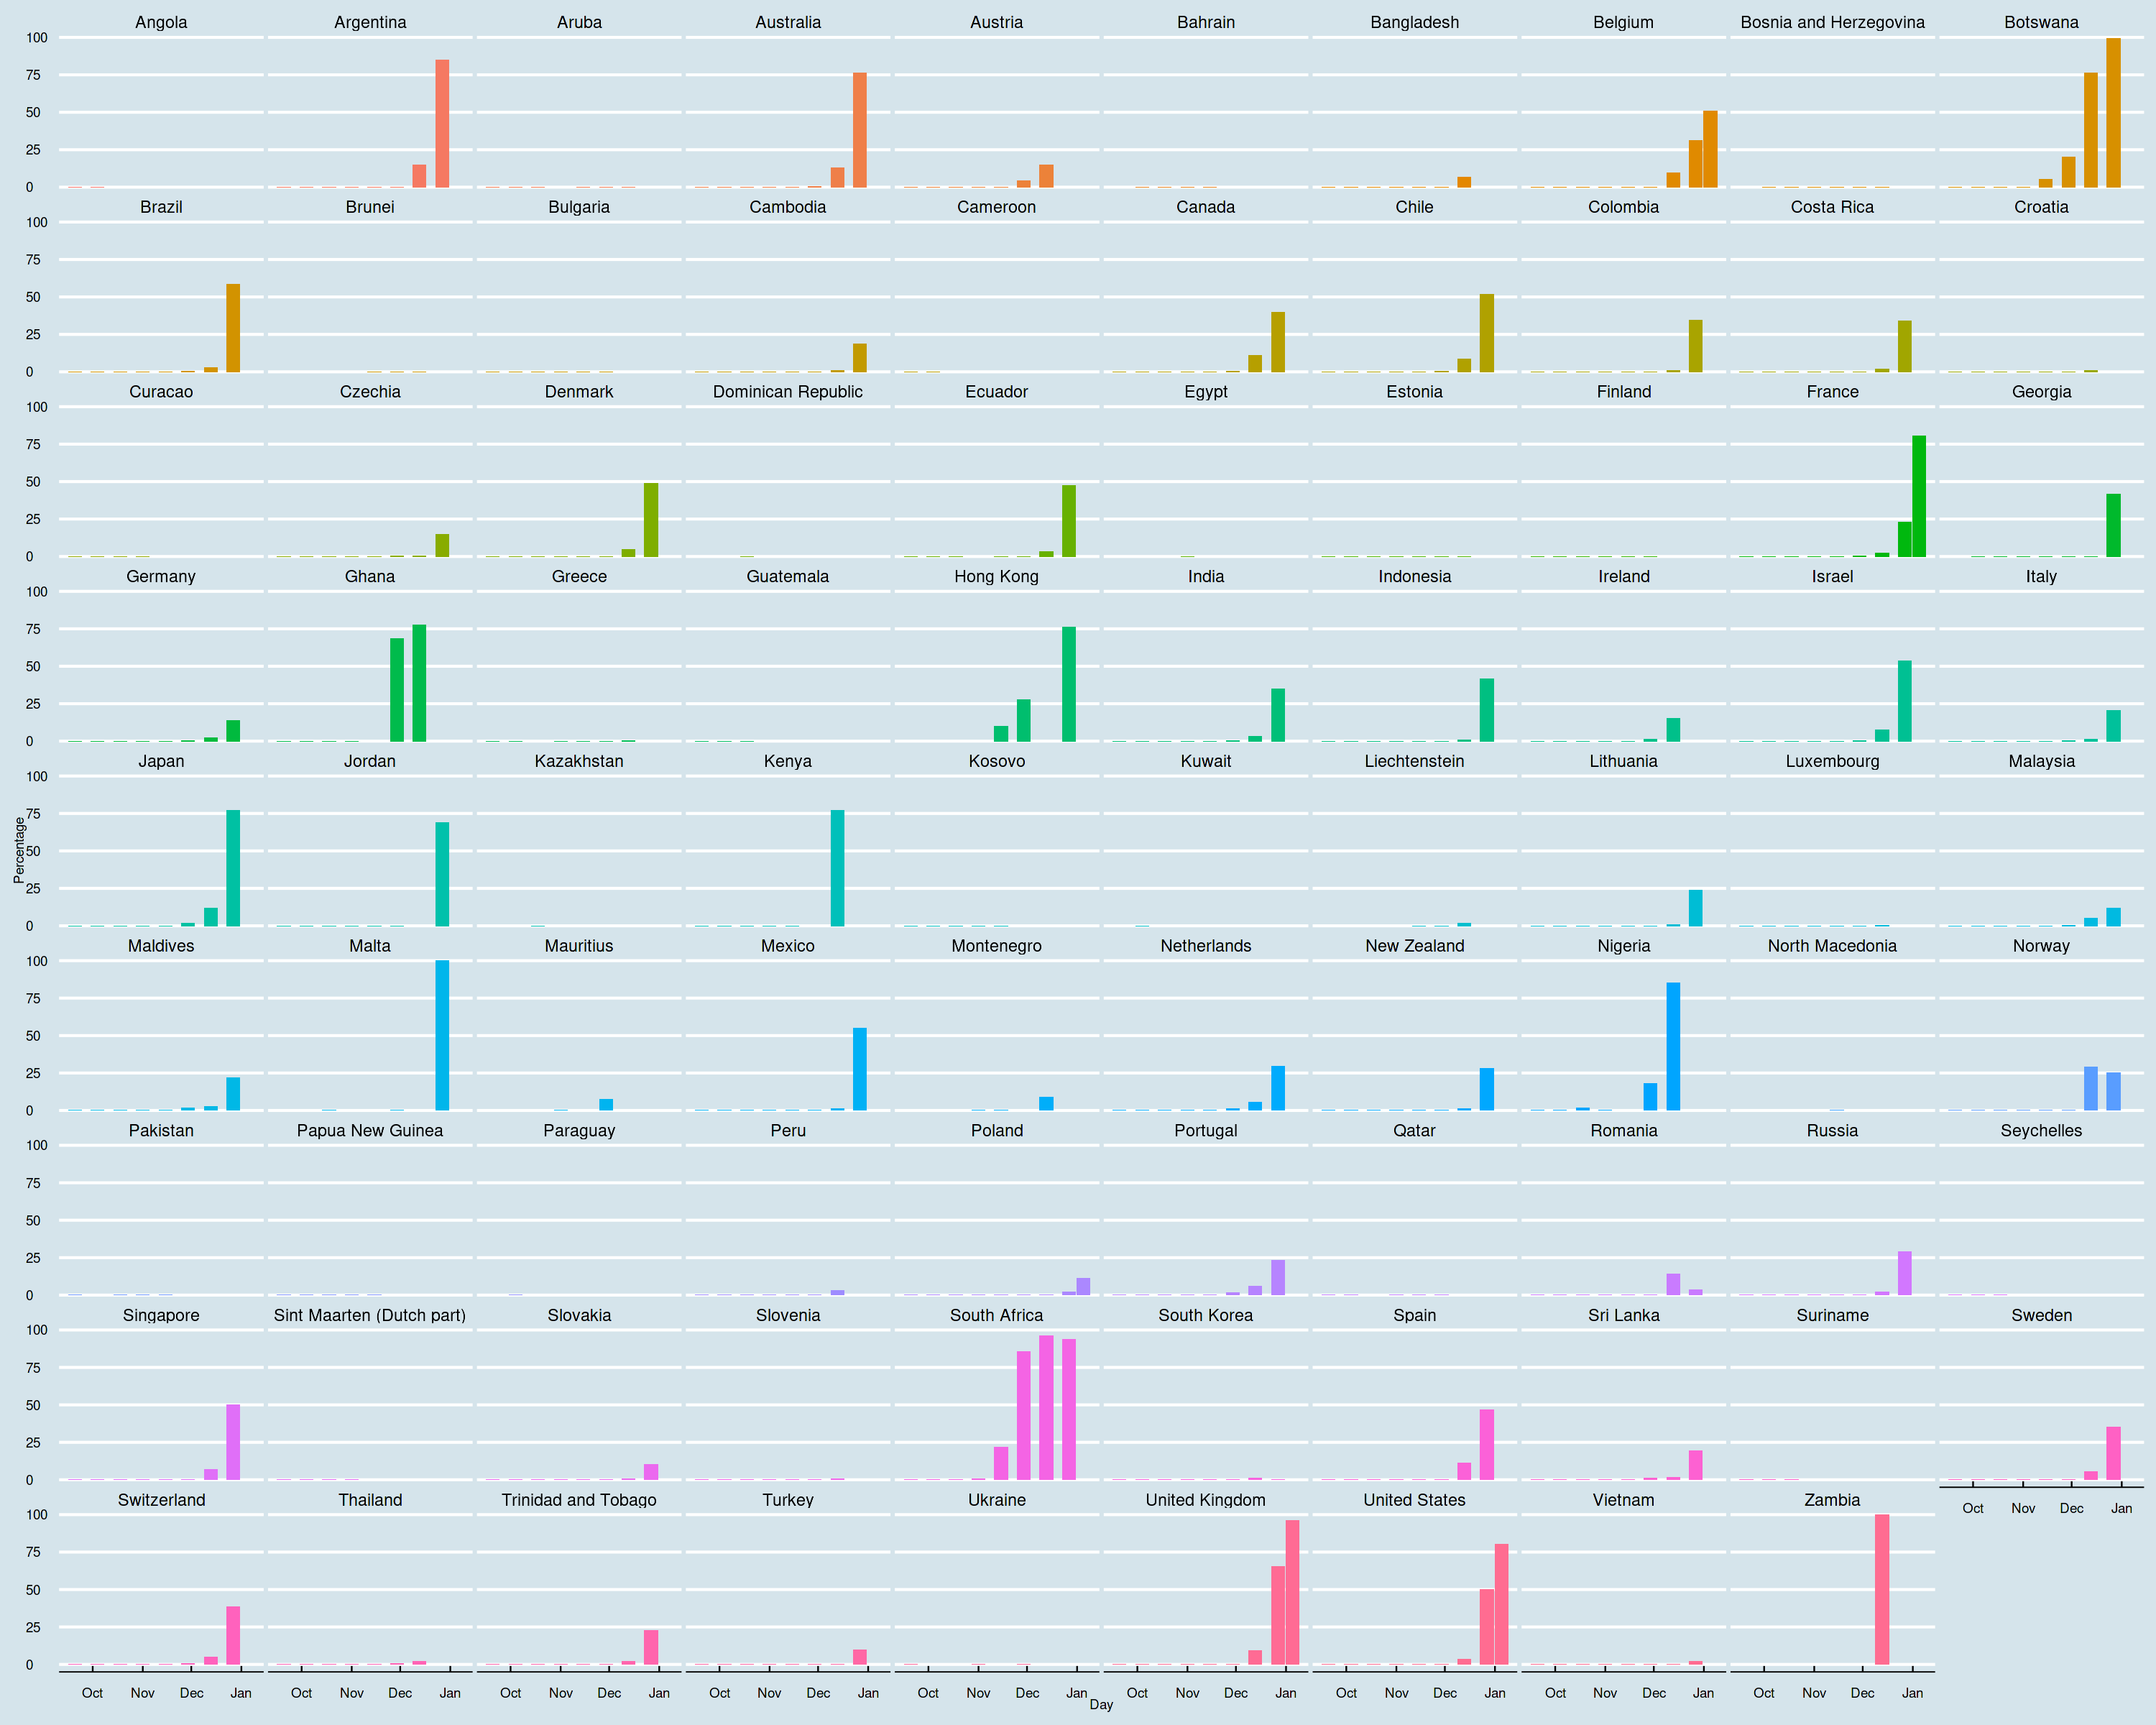

In [7]:

options(repr.plot.width = 25, repr.plot.height = 20)

omicron %>% group_by(country,Day) %>% summarize(pct = mean(percentage)) %>%
ggplot(aes(Day, pct, fill = country)) + geom_col(show.legend = FALSE) + facet_wrap(. ~ country) + theme_economist() + xlab("Day") + ylab("Percentage")

**Plotting the country's  Percentage of Omicron on the last recorded day i.e 5th Jan**

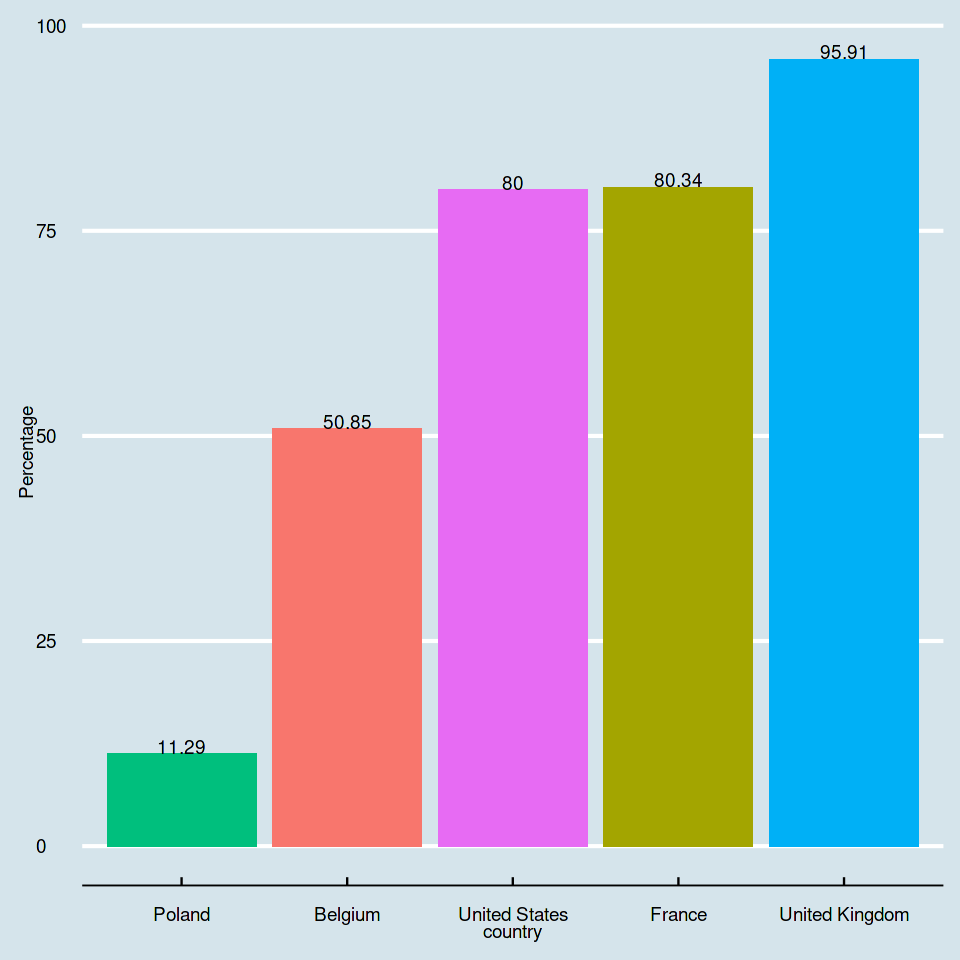

In [8]:
options(repr.plot.width = 8, repr.plot.height = 8)
omicron %>% filter(Day == "2022-01-05") %>% group_by(country)  %>% ggplot(aes(x = reorder(country, percentage), y = percentage, fill = country)) + geom_col(show.legend = FALSE) + geom_text(aes(label = percentage), vjust = 0.01) + theme_economist() + ylab("Percentage") + xlab("country")